[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1n_uyAy7ihTy2JI3kUdFOq2prm5MFjWy6?usp=sharing)

In [1]:
# Install the required libaries
!pip install fiftyone
!pip install tensorflow torch torchvision umap-learn
!pip install ipywidgets>=7.5

     |████████████████████████████████| 1.2 MB 12.3 MB/s 
     |████████████████████████████████| 639 kB 46.1 MB/s 
     |████████████████████████████████| 29.2 MB 50.4 MB/s 
     |████████████████████████████████| 226 kB 50.5 MB/s 
     |████████████████████████████████| 131 kB 48.3 MB/s 
     |████████████████████████████████| 13.2 MB 50.8 MB/s 
     |████████████████████████████████| 562 kB 51.9 MB/s 
     |████████████████████████████████| 106 kB 53.4 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 47.6 MB 71 kB/s 
     |████████████████████████████████| 79.9 MB 120 kB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 8.2 MB 34.5 MB/s 
     |███████████████████

In [2]:
# Then import them
import fiftyone as fo
import fiftyone.zoo as foz

In [9]:
# Import other libaries for deep learning
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
# Download 400 images of each category into a fiftyone dataset
# Mouse
dataset1 = foz.load_zoo_dataset(
              "open-images-v6",
              split="train",
              label_types=["detections", "segmentations"],
              classes=["Mouse"],
              max_samples=400,
              dataset_name="dataset1_test1",
          )

 100% |██████|    4.8Gb/4.8Gb [6.7s elapsed, 0s remaining, 775.5Mb/s]       
 100% |███████████████████| 400/400 [53.3s elapsed, 0s remaining, 6.6 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'train'
 100% |█████████████████| 400/400 [23.7s elapsed, 0s remaining, 18.8 samples/s]      
Dataset 'dataset1_test1' created


In [4]:
# Parrot
dataset2 = foz.load_zoo_dataset(
              "open-images-v6",
              split="train",
              label_types=["detections", "segmentations"],
              classes=["Parrot"],
              max_samples=400,
              dataset_name="dataset2_test1",
          )

 100% |███████████████████| 400/400 [54.8s elapsed, 0s remaining, 3.9 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'train'
 100% |█████████████████| 400/400 [22.4s elapsed, 0s remaining, 21.0 samples/s]      
Dataset 'dataset2_test1' created


In [5]:
# Snake
dataset3 = foz.load_zoo_dataset(
              "open-images-v6",
              split="train",
              label_types=["detections", "segmentations"],
              classes=["Snake"],
              max_samples=400,
              dataset_name="dataset3_test1",
          )

Found 1 images, downloading the remaining 399
 100% |███████████████████| 399/399 [52.2s elapsed, 0s remaining, 8.1 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'train'
 100% |█████████████████| 400/400 [16.6s elapsed, 0s remaining, 23.4 samples/s]      
Dataset 'dataset3_test1' created


In [6]:
# Download the images from the datasets as .jpg
dataset1.export(
   export_dir="dataset1", # its stored in coogle colab's temporal storage
   dataset_type = fo.types.ImageDirectory,
   label_field= "train",
)

dataset2.export(
   export_dir="dataset2",
   dataset_type = fo.types.ImageDirectory,
   label_field= "train",
)

dataset3.export(
   export_dir="dataset3",
   dataset_type = fo.types.ImageDirectory,
   label_field= "train",
)

 100% |█████████████████| 400/400 [3.2s elapsed, 0s remaining, 116.6 samples/s]      
 100% |█████████████████| 400/400 [2.9s elapsed, 0s remaining, 152.7 samples/s]      
 100% |█████████████████| 400/400 [2.4s elapsed, 0s remaining, 168.8 samples/s]      


In [30]:
# Load data, and do some prepocessing
import os, sys
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing.image import img_to_array

dirs = ["/content/dataset1/", "/content/dataset2/", "/content/dataset3/"]
labels = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] # onehot encoding

x_train = []; y_train = []
x_val = []; y_val = []
x_test = []; y_test = []

# load images from file
for category, dir in enumerate(dirs):
  files = listdir(dir)
  images_list = [i for i in files if i.endswith('.jpg')]
  for idx,img_name in enumerate(images_list):
    # open and reshape images
    img = Image.open(dir + img_name).convert('RGB')
    img = img.resize((150, 150))
    img = img_to_array(img)
    # append to corresponding array
    if(idx < 200):
      x_train.append(img)
      y_train.append(labels[category])
    elif(idx < 300):
      x_val.append(img)
      y_val.append(labels[category])
    elif(idx < 400):
      x_test.append(img)
      y_test.append(labels[category])

In [31]:
# Some more formatting
x_train = np.array(x_train,dtype='float64')#.reshape(-1, 150, 150, 1)
y_train = np.array(y_train)
x_val = np.array(x_val,dtype='float64')
y_val = np.array(y_val)
x_test = np.array(x_test,dtype='float64')
y_test = np.asarray(y_test)

In [48]:
# Create and freeze pretrained CNN (VGG16)
base_model = keras.applications.VGG16(
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [49]:
# Add trainable fully connected layers to a new model
model = keras.models.Sequential()
for layer in base_model.layers:
  layer.trainable=False
  model.add(layer)
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)      

In [50]:
# Compile the model
#early_stoping = keras.callbacks.EarlyStopping(patience=5, verbose=1)
#checkpointer = keras.callbacks.ModelCheckpoint(filepath='weights.hdf5', save_best_obly=True, verbose=1)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [51]:
# Train the model
model.fit(x_train, y_train,
          epochs=20, batch_size=16,
          #callbacks=[checkpointer, early_stoping],
          validation_data=(x_val, y_val))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 [==============================] - 7s 141ms/step - loss: 0.7881 - binary_accuracy: 0.6267 - val_loss: 1.2753 - val_binary_accuracy: 0.7067
Epoch 2/20
38/38 [==============================] - 5s 126ms/step - loss: 0.6688 - binary_accuracy: 0.7011 - val_loss: 0.4679 - val_binary_accuracy: 0.8256
Epoch 3/20
38/38 [==============================] - 5s 126ms/step - loss: 0.5712 - binary_accuracy: 0.7572 - val_loss: 0.3417 - val_binary_accuracy: 0.8967
Epoch 4/20
38/38 [==============================] - 5s 126ms/step - loss: 0.5135 - binary_accuracy: 0.8006 - val_loss: 0.2965 - val_binary_accuracy: 0.8967
Epoch 5/20
38/38 [==============================] - 5s 126ms/step - loss: 0.4587 - binary_accuracy: 0.8189 - val_loss: 0.2669 - val_binary_accuracy: 0.9100
Epoch 6/20
38/38 [==============================] - 5s 126ms/step - loss: 0.4173 - binary_accuracy: 0.8483 - val_loss: 0.2485 - val_binary_accuracy: 0.9156
Epoch 7/20
38/38 [==============================] - 5s 125ms/step - loss: 0

test accuracy: 0.87
Precision 0.8698256492315898
Recall 0.87
f1_score 0.869898080785353

Confusion matrix: 


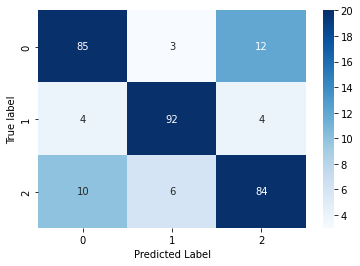

In [52]:
# Draw a confusion matrix with the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix,classification_report
import seaborn as sns
def test():
  # Make predictions
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred,1)
  y_true = np.argmax(y_test,1)
  # Draw the test datas and the matrix
  print("test accuracy: %g" %(accuracy_score(y_true, y_pred)))
  print("Precision", precision_score(y_true, y_pred, average="macro"))
  print("Recall", recall_score(y_true, y_pred, average="macro"))
  print("f1_score", f1_score(y_true, y_pred, average="macro"))
  print("\nConfusion matrix: ")
  conf=confusion_matrix(y_true, y_pred)
  ax = sns.heatmap(conf, annot=True, fmt='d', vmax=20, cmap='Blues') # a vmax paraméterrel állítjuk be, hogy milyen értéktartományban jelenítse meg az adatokat
  ax.set(xlabel='Predicted Label',
        ylabel='True label');

test()

In [53]:
# So the test accuracy is 87%
# Lets train the upper layers of the base model
model.get_layer('block5_conv1').trainable = True
model.get_layer('block5_conv2').trainable = True
model.get_layer('block5_conv3').trainable = True

In [54]:
# Train the model again
model.fit(x_train, y_train,
          epochs=10, batch_size=16,
          validation_data=(x_val, y_val))

Epoch 1/10
38/38 [==============================] - 5s 131ms/step - loss: 0.1351 - binary_accuracy: 0.9594 - val_loss: 0.2464 - val_binary_accuracy: 0.9100
Epoch 2/10
38/38 [==============================] - 5s 126ms/step - loss: 0.1409 - binary_accuracy: 0.9600 - val_loss: 0.2545 - val_binary_accuracy: 0.8989
Epoch 3/10
38/38 [==============================] - 5s 127ms/step - loss: 0.1245 - binary_accuracy: 0.9650 - val_loss: 0.2586 - val_binary_accuracy: 0.9022
Epoch 4/10
38/38 [==============================] - 5s 127ms/step - loss: 0.1115 - binary_accuracy: 0.9756 - val_loss: 0.2703 - val_binary_accuracy: 0.9000
Epoch 5/10
38/38 [==============================] - 5s 127ms/step - loss: 0.1006 - binary_accuracy: 0.9783 - val_loss: 0.2729 - val_binary_accuracy: 0.9000
Epoch 6/10
38/38 [==============================] - 5s 127ms/step - loss: 0.0884 - binary_accuracy: 0.9767 - val_loss: 0.2677 - val_binary_accuracy: 0.9056
Epoch 7/10
38/38 [==============================] - 5s 127ms/ste

test accuracy: 0.896667
Precision 0.8979634613946832
Recall 0.8966666666666666
f1_score 0.8971142411330634

Confusion matrix: 


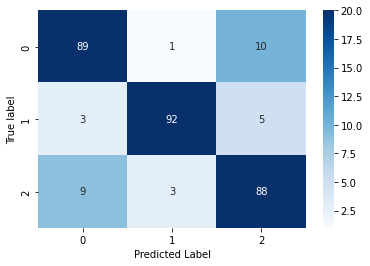

In [55]:
# Now accuracy is 90%, slightly better
test()